**Proyek Analisis Data : Bike Sharing Dataset**

1. Nama : Surya Eko Prasetyo
2. Email : surya.eko.pra@gmail.com
3. ID Dicoding : surya_eko

**Menentukan Pertanyaan Bisnis**
1. Season atau musim apa yang sering user lakukan untuk menyewa sepeda?
2. Bagaimana proses penyewaan sepeda setiap bulannya?

**Import Library Atau Packages yang digunakan**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency

**Data Wragling**

*Gathering Data*

In [2]:
#mengimpor data csv
day_bikes_sharing_df = pd.read_csv("D:\proyek_dicoding_surya\data\day.csv")
day_bikes_sharing_df.set_index('instant')

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\SURYA EKO PRASETYO\AppData\Local\Temp\ipykernel_17272\3817237764.py:2: SyntaxWarning: invalid escape sequence '\p'
  day_bikes_sharing_df = pd.read_csv("D:\proyek_dicoding_surya\data\day.csv")


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341


In [3]:
#mengimpor data csv
hour_bikes_sharing_df = pd.read_csv("D:\proyek_dicoding_surya\data\hour.csv")
hour_bikes_sharing_df.set_index('instant')

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\SURYA EKO PRASETYO\AppData\Local\Temp\ipykernel_17272\2012559353.py:2: SyntaxWarning: invalid escape sequence '\p'
  hour_bikes_sharing_df = pd.read_csv("D:\proyek_dicoding_surya\data\hour.csv")


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


Insight: Dapat dilihat dari tabel harian proses penyewaan sepeda ini terdapat 731 baris dengan 15 kolom di dalamnya dan ini merupakan proses gabungan data dari jam dan hari kemudiaan ditambahkan dengan informasi cuaca di dalamnya.

*Assesing Data*

**Cek Data Per Hari Proses Penyewaan Sepeda**

In [4]:
# Cek kualitas data
day_bikes_sharing_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight: dari informasi diatas bisa dilihat bahwa data tidak menunjukan adanya kehilangan data atau missing value, namun ada suatu hal yang harus diubah adalah tipe data dari kolom dteday dimana tipe data nya itu masih object dan harus diganti menjadi tipe data date**

In [5]:
#Cek Missing Values
day_bikes_sharing_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight: untuk lebih jelasnya di breakdown setiap kolom dalam dataframe tersebut untuk melihat lebih jelas bahwa tidak ada data yang null di dalam data tersebut**

In [6]:
# Cek Duplikasi data
day_bikes_sharing_df.duplicated().sum()

0

**Insight: setelah mengecek apakah ada missing value didapatkan informasi baru juga bahwa dalam data ini tidak terdapat data yang duplikat.**

In [7]:
# Cek Deskripsi Data
day_bikes_sharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight: bahwa dari deskripsi diatas menunjukan bahwa data ini cukup normal dan bisa untuk diolah datanya yang dapat menghasilkan sebuah keputusan**

**Cek Data Per Jam Proses Penyewaan**

In [8]:
hour_bikes_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight: dari informasi diatas bisa dilihat bahwa data tidak menunjukan adanya kehilangan data atau missing value, namun ada suatu hal yang harus diubah adalah tipe data dari kolom dteday dimana tipe data nya itu masih object dan harus diganti menjadi tipe data date**

In [9]:
hour_bikes_sharing_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight: untuk lebih jelasnya di breakdown setiap kolom dalam dataframe tersebut untuk melihat lebih jelas bahwa tidak ada data yang null di dalam data tersebut**

In [10]:
hour_bikes_sharing_df.duplicated().sum()

0

**Insight: setelah mengecek apakah ada missing value didapatkan informasi baru juga bahwa dalam data ini tidak terdapat data yang duplikat.**

In [11]:
hour_bikes_sharing_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight: bahwa dari deskripsi diatas menunjukan bahwa data ini cukup normal dan bisa untuk diolah datanya yang dapat menghasilkan sebuah keputusan**

*Cleaning Data*

**Mengganti Tipe Data**

In [12]:
#mengganti tipe data menjadi datetime
day_bikes_sharing_df['dteday'] = pd.to_datetime(day_bikes_sharing_df['dteday'])
hour_bikes_sharing_df['dteday'] = pd.to_datetime(hour_bikes_sharing_df['dteday'])

**Membuat Kolom Bulan dan tahun kemudian menghilangkan kolom month and yr**

In [13]:
day_bikes_sharing_df['month'] = day_bikes_sharing_df['dteday'].dt.month_name(locale='English')
day_bikes_sharing_df['year'] = day_bikes_sharing_df['dteday'].dt.year

hour_bikes_sharing_df['month'] = hour_bikes_sharing_df['dteday'].dt.month_name(locale='English')
hour_bikes_sharing_df['year'] = hour_bikes_sharing_df['dteday'].dt.year

In [14]:
# Menghapus Kolom yr and mnth
day_bikes_sharing_df.drop(columns=["yr","mnth"], axis=1, inplace=True)

In [15]:
#Menghapus kolom tahun bulan dan jam
hour_bikes_sharing_df.drop(columns=["yr","mnth","hr"], axis=1, inplace=True)

**Mengubah Ketegori Season**

In [16]:
day_bikes_sharing_df['season'] = day_bikes_sharing_df['season'].apply(lambda x: 'Springer' if x == 1 else('Summer' if x == 2 else('Fall' if x == 3 else 'Winter')))

In [17]:
hour_bikes_sharing_df['season'] = hour_bikes_sharing_df['season'].apply(lambda x: 'Springer' if x == 1 else('Summer' if x == 2 else('Fall' if x == 3 else 'Winter')))

**Mengubah Data Weekday menjadi nama hari**

In [18]:
day_bikes_sharing_df['weekday'] = day_bikes_sharing_df['weekday'].apply(lambda x: 'Sunday' if x == 0 else('Monday' if x == 1 else('Tuesday' if x == 2 else('Wednesday' if x == 3 else('Thursday' if x==4 else('Friday' if x == 5 else 'Saturday'))))))

In [19]:
hour_bikes_sharing_df['weekday'] = hour_bikes_sharing_df['weekday'].apply(lambda x: 'Sunday' if x == 0 else('Monday' if x == 1 else('Tuesday' if x == 2 else('Wednesday' if x == 3 else('Thursday' if x==4 else('Friday' if x == 5 else 'Saturday'))))))

In [20]:
day_bikes_sharing_df

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month,year
0,1,2011-01-01,Springer,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,January,2011
1,2,2011-01-02,Springer,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,January,2011
2,3,2011-01-03,Springer,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,January,2011
3,4,2011-01-04,Springer,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,January,2011
4,5,2011-01-05,Springer,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,January,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Springer,0,Thursday,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,December,2012
727,728,2012-12-28,Springer,0,Friday,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,December,2012
728,729,2012-12-29,Springer,0,Saturday,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,December,2012
729,730,2012-12-30,Springer,0,Sunday,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,December,2012


*Exploratory Data Analysis*

**Gabungkan dua data dengan concat**

In [21]:
# Menggabungkan dua data menjadi satu data dengan fungsi concat
bikes_day_hour_df = pd.concat([hour_bikes_sharing_df,day_bikes_sharing_df], ignore_index=True)
bikes_day_hour_df

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month,year
0,1,2011-01-01,Springer,0,Saturday,0,1,0.240000,0.287900,0.810000,0.000000,3,13,16,January,2011
1,2,2011-01-01,Springer,0,Saturday,0,1,0.220000,0.272700,0.800000,0.000000,8,32,40,January,2011
2,3,2011-01-01,Springer,0,Saturday,0,1,0.220000,0.272700,0.800000,0.000000,5,27,32,January,2011
3,4,2011-01-01,Springer,0,Saturday,0,1,0.240000,0.287900,0.750000,0.000000,3,10,13,January,2011
4,5,2011-01-01,Springer,0,Saturday,0,1,0.240000,0.287900,0.750000,0.000000,0,1,1,January,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18105,727,2012-12-27,Springer,0,Thursday,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,December,2012
18106,728,2012-12-28,Springer,0,Friday,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,December,2012
18107,729,2012-12-29,Springer,0,Saturday,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,December,2012
18108,730,2012-12-30,Springer,0,Sunday,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,December,2012


**Insight: disini menggabungkan dua data yaitu per jam dan per hari dengan tujuan untuk memudahkan dalam analisis data berdasarkan pertanyaan bisnis yang sudah dibuat**

In [22]:
bikes_day_hour_df.describe()

,instant,dteday,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year
count,18110.000000,18110,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000
mean,8354.006405,2012-01-02 03:00:25.046935296,0.028769,0.682772,1.424075,0.496922,0.475718,0.627256,0.190113,68.472336,295.158697,363.631033,2011.502485
min,1.000000,2011-01-01 00:00:00,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000
25%,3797.250000,2011-07-04 00:00:00,0.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,37.000000,43.000000,2011.000000
50%,8324.500000,2012-01-02 00:00:00,0.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.188951,18.000000,123.000000,152.000000,2012.000000
75%,12851.750000,2012-07-02 00:00:00,0.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,55.000000,238.000000,305.000000,2012.000000
max,17379.000000,2012-12-31 00:00:00,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,3410.000000,6946.000000,8714.000000,2012.000000
std,5180.771860,NaN,0.167160,0.465410,0.635830,0.192177,0.171496,0.191147,0.120851,216.588054,771.555142,950.827954,0.500008


**Mendownload data yang sudah digabung menjadi bentuk CSV**

In [23]:
bikes_day_hour_df.to_csv('data.csv', index=False)

**Mengambil dan mengelompokkan data season masing masing users antara casual dan registered**

In [24]:
season_data_df = bikes_day_hour_df.groupby(by='season').agg({
    "casual" : "sum",
    "registered" : "sum"
})

season_data_df.sort_values(by=['casual','registered'], ascending=[False,False])

,casual,registered
season,,
Fall,452182,1670076
Summer,407044,1430134
Winter,259564,1423662
Springer,121244,821452


**Insight = bisa dilihat dari data diatas bahwa pengguna casual dan registered yang sering menyewa sepeda itu pada musim gugur atau fall kemudian dilanjut dengan musim panas kemudian musim salju dan yang terakhir yang paling sedikit yaitu musim semi**

**Mengambil Jumlah pelanggan yang melakukan penyewaan sepeda per Bulan**

In [25]:
monthly_bikes_sharing_df = bikes_day_hour_df.resample(rule='D', on='dteday').agg({
    "cnt" : "sum"
})

monthly_bikes_sharing_df.reset_index()



,dteday,cnt
0,2011-01-01,1970
1,2011-01-02,1602
2,2011-01-03,2698
3,2011-01-04,3124
4,2011-01-05,3200
...,...,...
726,2012-12-27,4228
727,2012-12-28,6190
728,2012-12-29,2682
729,2012-12-30,3592


**Mengambil jumlah users pada tahun 2011**

In [26]:
month_order = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
monthly_bikes_sharing_2011_df = monthly_bikes_sharing_df.loc['2011-01-01':'2011-12-31']
monthly_bikes_sharing_2011_df['Month'] = monthly_bikes_sharing_2011_df.index.strftime('%B')
monthly_bikes_sharing_2011_df = monthly_bikes_sharing_2011_df.reset_index()

group_monthly_bikes_sharing_2011_df = monthly_bikes_sharing_2011_df.groupby(by='Month').agg({
    "cnt" : "sum"
})
group_monthly_bikes_sharing_2011_df['Month_Number'] = group_monthly_bikes_sharing_2011_df.index.map(month_order)

group_monthly_bikes_sharing_2011_df = group_monthly_bikes_sharing_2011_df.sort_values('Month_Number')

group_monthly_bikes_sharing_2011_df = group_monthly_bikes_sharing_2011_df.drop('Month_Number', axis=1)

group_monthly_bikes_sharing_2011_df.sort_values(by='cnt',ascending=False)


C:\Users\SURYA EKO PRASETYO\AppData\Local\Temp\ipykernel_17272\3727488996.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_bikes_sharing_2011_df['Month'] = monthly_bikes_sharing_2011_df.index.strftime('%B')


,cnt
Month,
June,287024
July,282682
August,273382
May,271642
September,254836
October,247022
November,204334
April,189740
December,174646


**Insight : Dari data yang didapatkan diatas bisa dilihat bahwa pada tahun 2011 bulan june adalah bulan dengan jumlah penyewaan sepeda oleh pengguna yang paling banyak karena pada bulan tersebut merupakan musim panas yang juga musim dimana banyak orang yang menggunakan sepeda untuk bepergian kemana mana ditambah bahwa di kota washington DC yang saya baca sepeda itu menjadi transportasi terbaik untuk digunakan karena memiliki banyak stasiun dan jalur nya sendiri**

**Mengambil jumlah users pada tahun 2012**

In [27]:
monthly_bikes_sharing_2012_df = monthly_bikes_sharing_df.loc['2012-01-01':'2012-12-31']
monthly_bikes_sharing_2012_df['Month'] = monthly_bikes_sharing_2012_df.index.strftime('%B')
monthly_bikes_sharing_2012_df = monthly_bikes_sharing_2012_df.reset_index()

group_monthly_bikes_sharing_2012_df = monthly_bikes_sharing_2012_df.groupby(by='Month').agg({
    "cnt" : "sum"
})
group_monthly_bikes_sharing_2012_df['Month_Number'] = group_monthly_bikes_sharing_2012_df.index.map(month_order)

group_monthly_bikes_sharing_2012_df = group_monthly_bikes_sharing_2012_df.sort_values('Month_Number')

group_monthly_bikes_sharing_2012_df = group_monthly_bikes_sharing_2012_df.drop('Month_Number', axis=1)

group_monthly_bikes_sharing_2012_df.sort_values(by='cnt',ascending=False)

C:\Users\SURYA EKO PRASETYO\AppData\Local\Temp\ipykernel_17272\3204069086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_bikes_sharing_2012_df['Month'] = monthly_bikes_sharing_2012_df.index.strftime('%B')


,cnt
Month,
September,437146
August,429006
July,407214
June,405660
October,397682
May,391730
April,348448
March,329750
November,305328


**Insight : Dari data yang didapatkan diatas bisa dilihat bahwa perbedaan pada tahun 2012  bulan dengan jumlah penyewaan sepeda oleh pengguna yang paling banyak ada pada bulan september karena pada bulan tersebut merupakan musim gugur yang juga musim dimana banyak orang yang menggunakan sepeda untuk bepergian kemana mana ditambah bahwa di kota washington DC yang saya baca sepeda itu menjadi transportasi terbaik untuk digunakan karena memiliki banyak stasiun dan jalur nya sendiri**

**Mengambil total users berdasarkan data hari per harinya**

In [28]:
day_daily_sharing_df = bikes_day_hour_df.groupby(by='weekday', as_index=False).cnt.sum()
day_daily_sharing_df = day_daily_sharing_df.sort_values(by='cnt', ascending=False)
day_daily_sharing_df

,weekday,cnt
0,Friday,975580
4,Thursday,970790
2,Saturday,955614
6,Wednesday,946096
5,Tuesday,938218
1,Monday,911006
3,Sunday,888054


**Insight: dari hasil data yang dikelompokkan berdasarkan hari dalam seminggu proses penyewaan sepeda memiliki rata-rata yang tidak jauh setiap harinya dan untuk hari yang banyak proses penyewaan itu ada di hari jumat atau Friday.**

**Mengambil rata-rata jumlah users berdasarkan data hari per hari**

In [29]:
avg_day_daily_sharing_df = bikes_day_hour_df.groupby(by='weekday', as_index=False).cnt.mean()
avg_day_daily_sharing_df = avg_day_daily_sharing_df.sort_values(by='cnt', ascending=False)
avg_day_daily_sharing_df

,weekday,cnt
4,Thursday,377.005825
0,Friday,376.526438
5,Tuesday,366.921392
6,Wednesday,366.846064
2,Saturday,365.156286
1,Monday,352.556502
3,Sunday,340.642117


*Data Visualization & Explanatory Analysis*

**Pertanyaan 1**

C:\Users\SURYA EKO PRASETYO\AppData\Local\Temp\ipykernel_17272\2828551036.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\SURYA EKO PRASETYO\AppData\Local\Temp\ipykernel_17272\2828551036.py:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


C:\Users\SURYA EKO PRASETYO\AppData\Local\Temp\ipykernel_17272\2828551036.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\SURYA EKO PRASETYO\AppData\Local\Temp\ipykernel_17272\2828551036.py:19: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


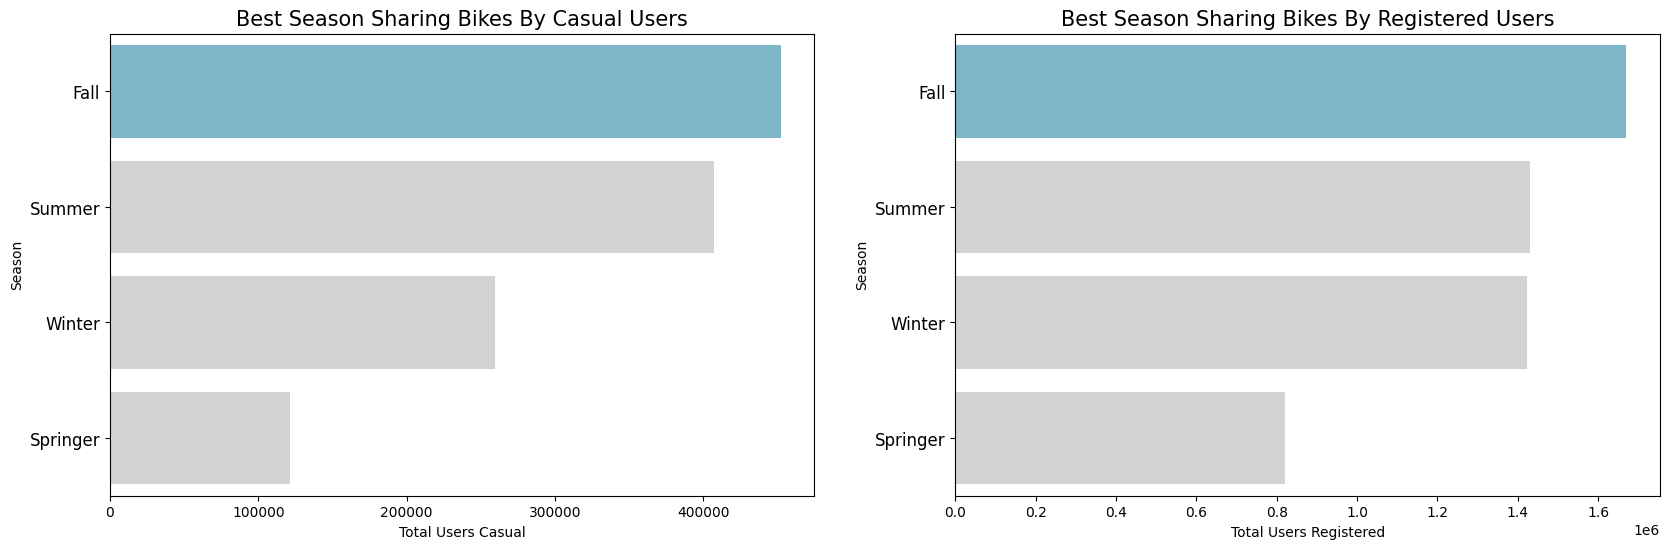

In [30]:
#membuat dua kolom yang berisi dua diagram batang
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x = 'casual',
    y= 'season',
    data=season_data_df.sort_values(by='casual',ascending=False),
    palette=colors,
    ax=ax[0],
    legend="auto"
)

ax[0].set_ylabel("Season")
ax[0].set_xlabel("Total Users Casual")
ax[0].set_title("Best Season Sharing Bikes By Casual Users",loc="center",fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(
    x = 'registered',
    y= 'season',
    data=season_data_df.sort_values(by='registered', ascending=False),
    palette=colors,
    ax=ax[1]
)

ax[1].set_ylabel("Season")
ax[1].set_xlabel("Total Users Registered")
ax[1].set_title("Best Season Sharing Bikes By Registered Users",loc="center",fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

**Pertanyaan 2**

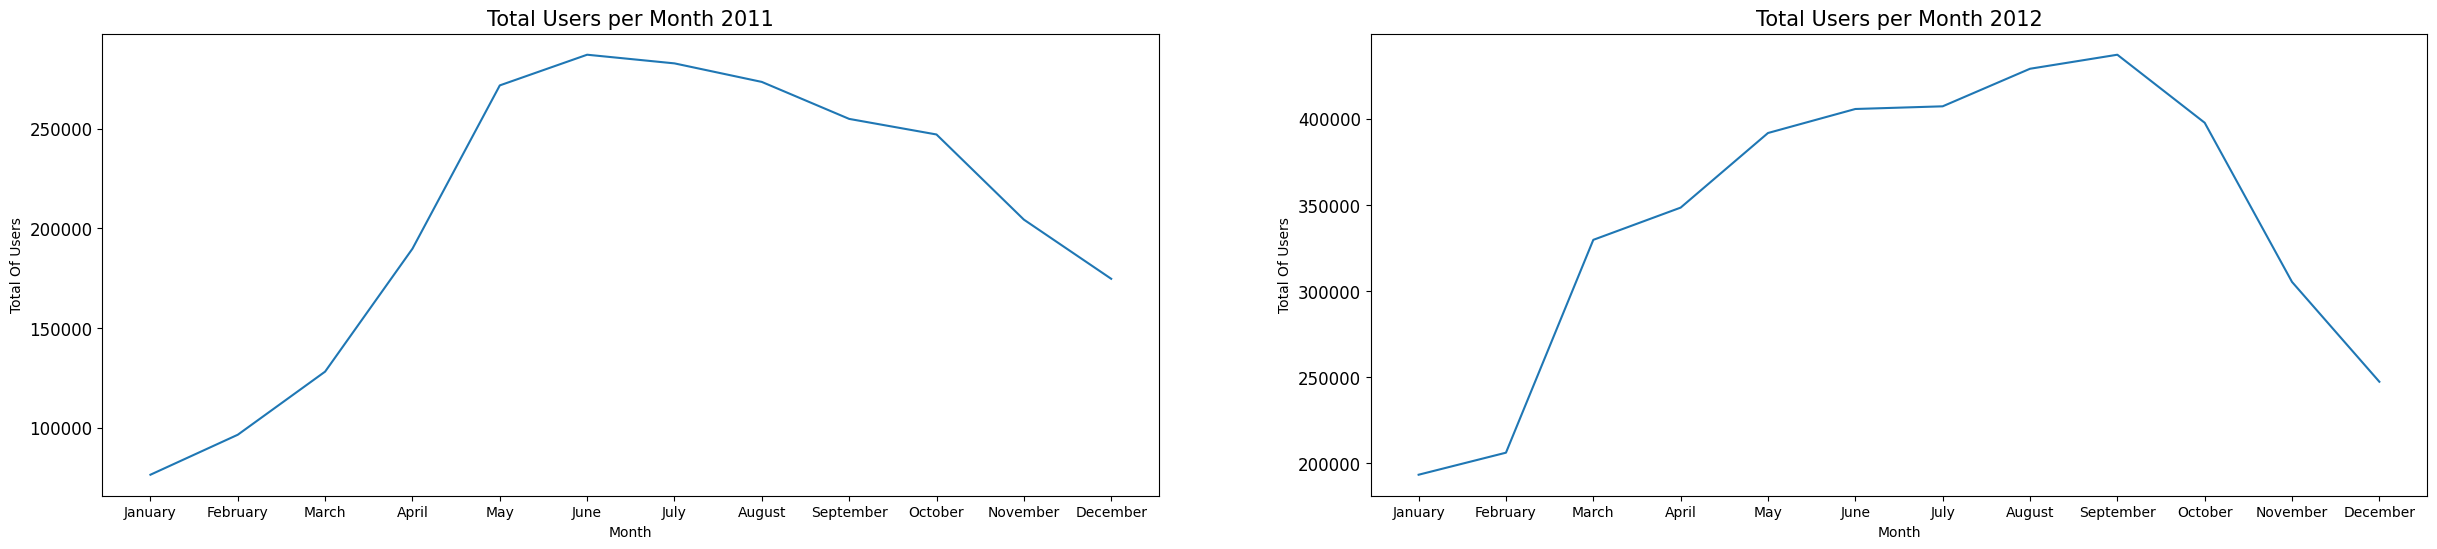

In [31]:
#membuat dua kolom yang diisi oleh diagram garis
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(30,6))

sns.lineplot(
    x='Month',
    y='cnt',
    data=group_monthly_bikes_sharing_2011_df,
    ax=ax[0]
)

ax[0].set_ylabel("Total Of Users")
ax[0].set_xlabel("Month")
ax[0].set_title("Total Users per Month 2011",loc="center",fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.lineplot(
    x='Month',
    y='cnt',
    data=group_monthly_bikes_sharing_2012_df,
    ax=ax[1]
)

ax[1].set_ylabel("Total Of Users")
ax[1].set_xlabel("Month")
ax[1].set_title("Total Users per Month 2012",loc="center",fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

**Insight:**

**1. Untuk pertanyaan pertama dimana season apa yang orang lakukan ketika ingin menyewa sepeda dan dari data tersebut bisa dilihat bahwa musim fall atau musim gugur untuk pengguna casual dan pangguna register sama sama menempati urutan pertama dan bisa disimpulkan bahwa mereka sering melakukan penyewaan sepeda pada musim fall atau gugur dan juga dari data bisa dilihar bahwa urutan nya itu sama tidak ada yang berbeda**

**2. Untuk pertanyaan kedua bagaimana proses penyewaan setiap bulannya dari data bisa dilihat di tahun 2011 itu cenderung pertumbuhan nya menaik secara konsisten dan paling signifikan kenaikannya itu di bulan June, kemudian mulai menurun di bulan juli dan penurunan signifikan ada di bulan desember, sedangkan pada tahun 2012 itu pertumbuhan nya berbeda dari tahun sebelumnya karena penaikan nya dimulai dari bulan maret tetapi selanjutnya itu naik turun dan menaik secara signifikan ada pada bulan september kemudian setelah itu turun kembali dan sama menurun secara signifikan di bulan Desember. Kenapa bulan desember selalu terjadi penurunan karena di kota Washington DC terjadi musim dingin sehingga banyak orang yang tidak melakukan berpergian sama seperti di data pertanyaan satu bahwa musim dingin merupakan musim paling sedikit dalam penyewaan sepeda oleh users ini**

*Analisis Lanjutan*

**Manual Grouping : Jumlah Users yang menyewa sepeda berdasarkan Hari**

C:\Users\SURYA EKO PRASETYO\AppData\Local\Temp\ipykernel_17272\600565404.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\SURYA EKO PRASETYO\AppData\Local\Temp\ipykernel_17272\600565404.py:5: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.barplot(
C:\Users\SURYA EKO PRASETYO\AppData\Local\Temp\ipykernel_17272\600565404.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\SURYA EKO PRASETYO\AppData\Local\Temp\ipykernel_17272\600565404.py:17: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.barplot(


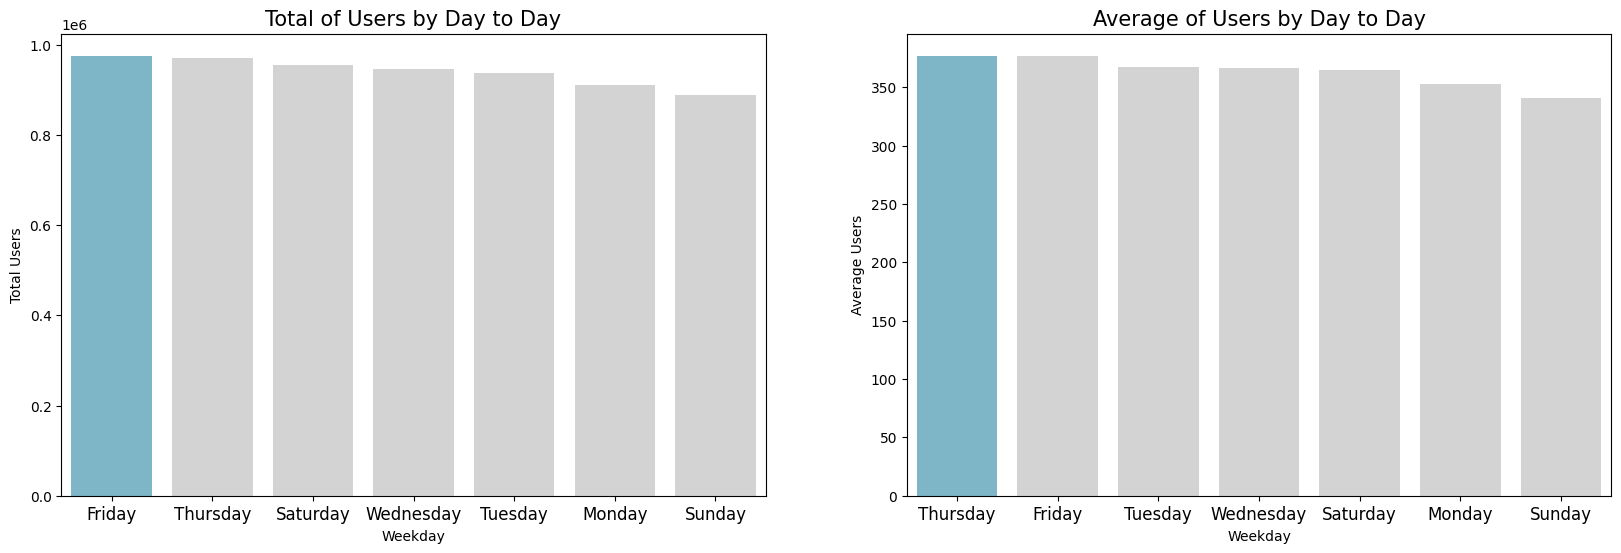

<Figure size 1000x500 with 0 Axes>

In [34]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 5))
sns.barplot(
    x='weekday',
    y='cnt',
    data=day_daily_sharing_df,
    palette=colors_,
    ax=ax[0]
)

ax[0].set_title("Total of Users by Day to Day", loc="center", fontsize=15)
ax[0].set_ylabel("Total Users")
ax[0].set_xlabel("Weekday")
ax[0].tick_params(axis='x', labelsize=12)
sns.barplot(
    x='weekday',
    y='cnt',
    data=avg_day_daily_sharing_df,
    palette=colors_,
    ax=ax[1]
)

ax[1].set_title("Average of Users by Day to Day", loc="center", fontsize=15)
ax[1].set_ylabel("Average Users")
ax[1].set_xlabel("Weekday")
ax[1].tick_params(axis='x', labelsize=12)



**Insight:**

**Bahwa total user per hari nya itu sebenarnya memiliki jumlah yang tidak terlalu jauh bisa dilihat per harinya itu jumlah nya tidak ada yang berbeda signifikan dan dimana di hari friday atau jumat itu kebanyakan users menyewa sepeda sebaliknya kalau rata rata itu ada pada hari thursday atau kamis yang sebenernya secara data juga tidak menunjukan perbedaan yang cukup signifikan**

*Conclusion*

**Pertanyaan 1 : Bahwa sudah diketahui musim gugur menjadi musim terbaik atau yang sering user lakukan untuk menyewa sepeda jadi mungkin ketika musim gugur itu lebih diperbanyak lagi sepeda yang akan disewa oleh pengguna**

**Pertanyaan 2 : Bahwa dalam setiap tahun setiap bulan nya itu proses penyewaan sepeda didasarkan juga kepada minat pengguna dan perlu diketahui di kota Washington DC itu sepeda menjadi kendaraan yang sering digunakan oleh pengguna dan salah satu faktor juga adalah musim yang ada di kota tersebut tapi kembali lagi dalam pertumbuhan nya proses penyewaan ini sudah cukup baik dan efektif**